In [1]:
#load FPS images
#point to ROIs using threshhold
#mask ROIs
#load Rotation beta images
#apply mask to rotation images
#take values out of ROI from rotation image

In [31]:
import nilearn as nl
from nilearn import plotting
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

#load FPS image
sub = 'sub-04'
epiFile = '/home/lmn/Desktop/fpvs/workingDir/output/FPSimages/'+sub+'_SNR_positive.nii'
epi = nib.load(epiFile)
epiData = epi.get_data()
epiDataC = epiData
#put mask around threshholded areas
#nl.masking.compute_epi_mask(epiFile, lower_cutoff=0.2, upper_cutoff=0.85, connected=True, opening=2, exclude_zeros=False, ensure_finite=True, target_affine=None, target_shape=None, memory=None, verbose=0)
#print (epi)

(53, 63, 52)
[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]
[[13.310268038229111, 41, 11, 28], [12.889624724987636, 11, 16, 18], [12.430178848376226, 11, 14, 17], [11.93455071679906, 10, 21, 14], [11.884450741694426, 10, 17, 29]]
13.310268038229111
12.889624724987636
12.430178848376226
11.93455071679906
11.884450741694426


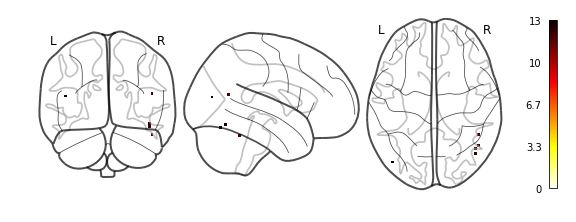

In [54]:
#find the 5 voxels with the highest activation and save them to lists
highest = [[0 for third in range(4)] for fist in range(5)]
print (epiData.shape)
print (highest)
for x in range(0,len(epiData)):
    for y in range(0,len(epiData[0])):
        for z in range(0,len(epiData[0][0])):
            if numpy.isnan(epiData[x][y][z]) == True:
                epiData[x][y][z] = 0
            if epiData[x][y][z] > highest[0][0]:
                highest[4][0] = highest[3][0]
                highest[4][1] = highest[3][1]
                highest[4][2] = highest[3][2]
                highest[4][3] = highest[3][3]
                
                highest[3][0] = highest[2][0]
                highest[3][1] = highest[2][1]
                highest[3][2] = highest[2][2]
                highest[3][3] = highest[2][3]
                
                highest[2][0] = highest[1][0]
                highest[2][1] = highest[1][1]
                highest[2][2] = highest[1][2]
                highest[2][3] = highest[1][3]
                
                highest[1][0] = highest[0][0]
                highest[1][1] = highest[0][1]
                highest[1][2] = highest[0][2]
                highest[1][3] = highest[0][3]
                
                highest[0][0] = epiData[x][y][z]
                highest[0][1] = x
                highest[0][2] = y
                highest[0][3] = z
                
print (highest)

#fill epiDataC with zeroes
for i in range(0,len(epiDataC)):
    for ii in range(0,len(epiDataC[0])):
        for iii in range(0,len(epiDataC[0][0])):
            epiDataC[i][ii][iii] = 0

#put the 5 voxels with the highest activation in the right place in the empty image
epiDataC [highest[0][1]][highest[0][2]][highest[0][3]] = highest[0][0]
epiDataC [highest[1][1]][highest[1][2]][highest[1][3]] = highest[1][0]
epiDataC [highest[2][1]][highest[2][2]][highest[2][3]] = highest[2][0]
epiDataC [highest[3][1]][highest[3][2]][highest[3][3]] = highest[3][0]
epiDataC [highest[4][1]][highest[4][2]][highest[4][3]] = highest[4][0]
print(epiDataC[highest[0][1]][highest[0][2]][highest[0][3]])
print(epiDataC [highest[1][1]][highest[1][2]][highest[1][3]])
print(epiDataC [highest[2][1]][highest[2][2]][highest[2][3]])
print(epiDataC [highest[3][1]][highest[3][2]][highest[3][3]])
print(epiDataC [highest[4][1]][highest[4][2]][highest[4][3]])

#display the image
display = plotting.plot_glass_brain(epi,
                                 colorbar=True,
                                 threshold = 0,
#                                 cut_coords = (41, 11, 28)
                                 )
#coords = [(41, 11, 28)]
#display.add_markers(coords, marker_color='y', marker_size=50)
plotting.show()

(182, 218, 182)


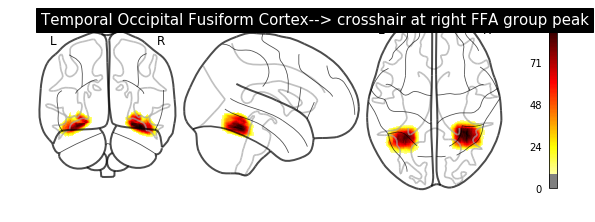

In [49]:
#approx FFA region from github.com/kesslerr
from nilearn.datasets import fetch_atlas_harvard_oxford
atlas = fetch_atlas_harvard_oxford(atlas_name = 'cort-prob-1mm', symmetric_split = False) # symm split only works for subcortical
atlas_filename = atlas.maps
print(nilearn.image.index_img(atlas_filename,38).shape)
display = nl.plotting.plot_glass_brain(nilearn.image.index_img(atlas_filename,38),
                                 colorbar=True,
                                 title=atlas.labels[38+1] + "--> crosshair at right FFA group peak",
                                 threshold = 10,
#                                 cut_coords = (0, 0, 0)
                                 )
#coords = [(60, 20, 20)]
#display.add_markers(coords, marker_color='y', marker_size=50)
nl.plotting.show()


In [64]:
FFA = nilearn.image.index_img(atlas_filename,38).get_data()
print (FFA)

for i in range(0,len(FFA)):
    for ii in range(0,len(FFA[0])):
        for iii in range(0,len(FFA[0][0])):
            if FFA[i][ii][iii] != 0: 
                print(i,ii,iii,FFA[i][ii][iii])

#nl.plotting.plot_glass_brain(inROI,
#                                 colorbar=True,
#                                 threshold = 0,
#                                 )
#nl.plotting.show()

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
33 75 47 1
33 75 48 1
33 76 47 1
33 76 48 1
33 77 47 1
33 77 48 1
34 69 45 1
34 70 45 1
34 70 46 1
34 71 45 3
34 71 46 1
34 72 44 1
34 72 45 3
34 72 50 1
34 73 44 1
34 73 45 2
34 73 50 1
34 73 51 1
34 74 45 1
34 74 47 1
34 74 

37 84 51 3
37 84 52 2
37 84 53 1
37 85 42 1
37 85 43 3
37 85 44 6
37 85 45 5
37 85 46 4
37 85 47 4
37 85 48 4
37 85 49 3
37 85 50 2
37 85 51 1
37 85 52 1
37 85 53 1
37 86 42 1
37 86 43 2
37 86 44 4
37 86 45 4
37 86 46 4
37 86 47 3
37 86 48 3
37 86 49 1
37 87 43 1
37 87 44 4
37 87 45 4
37 87 46 4
37 87 47 4
37 87 48 3
37 87 49 1
37 88 43 1
37 88 44 3
37 88 45 3
37 88 46 3
37 88 47 4
37 88 48 3
37 88 49 1
37 89 44 2
37 89 45 2
37 89 46 2
37 89 47 3
37 89 48 2
37 90 44 1
37 90 45 1
37 90 46 1
37 90 47 1
37 90 48 1
38 61 51 1
38 62 46 1
38 62 47 1
38 62 48 1
38 62 49 1
38 62 50 1
38 62 51 1
38 63 46 1
38 63 47 2
38 63 48 2
38 63 49 1
38 63 50 2
38 63 51 3
38 63 52 1
38 63 53 1
38 63 54 1
38 64 46 2
38 64 47 4
38 64 48 3
38 64 49 4
38 64 50 5
38 64 51 5
38 64 52 3
38 64 53 3
38 64 54 3
38 64 55 2
38 64 56 1
38 65 46 2
38 65 47 4
38 65 48 4
38 65 49 6
38 65 50 9
38 65 51 9
38 65 52 6
38 65 53 6
38 65 54 5
38 65 55 3
38 65 56 1
38 66 45 1
38 66 46 2
38 66 47 4
38 66 48 4
38 66 49 8
38 66 50 1

40 66 58 6
40 66 59 1
40 67 44 2
40 67 45 4
40 67 46 5
40 67 47 6
40 67 48 9
40 67 49 14
40 67 50 18
40 67 51 20
40 67 52 20
40 67 53 19
40 67 54 17
40 67 55 15
40 67 56 13
40 67 57 11
40 67 58 7
40 67 59 1
40 68 44 2
40 68 45 4
40 68 46 5
40 68 47 6
40 68 48 10
40 68 49 14
40 68 50 20
40 68 51 23
40 68 52 23
40 68 53 22
40 68 54 19
40 68 55 16
40 68 56 14
40 68 57 11
40 68 58 7
40 68 59 1
40 69 44 2
40 69 45 4
40 69 46 5
40 69 47 7
40 69 48 10
40 69 49 14
40 69 50 21
40 69 51 25
40 69 52 25
40 69 53 23
40 69 54 19
40 69 55 16
40 69 56 14
40 69 57 11
40 69 58 7
40 69 59 2
40 70 44 3
40 70 45 3
40 70 46 5
40 70 47 7
40 70 48 11
40 70 49 16
40 70 50 22
40 70 51 25
40 70 52 26
40 70 53 24
40 70 54 18
40 70 55 15
40 70 56 12
40 70 57 10
40 70 58 7
40 70 59 2
40 70 60 1
40 71 43 1
40 71 44 3
40 71 45 3
40 71 46 5
40 71 47 7
40 71 48 12
40 71 49 17
40 71 50 21
40 71 51 23
40 71 52 23
40 71 53 21
40 71 54 15
40 71 55 12
40 71 56 10
40 71 57 9
40 71 58 7
40 71 59 3
40 71 60 1
40 72 43 1
40 72 

41 91 52 2
41 91 53 2
41 91 54 2
41 91 55 1
41 91 56 1
42 54 55 1
42 54 56 1
42 54 57 1
42 55 54 1
42 55 55 2
42 55 56 2
42 55 57 2
42 56 54 1
42 56 55 3
42 56 56 2
42 56 57 2
42 56 58 1
42 57 54 1
42 57 55 3
42 57 56 3
42 57 57 3
42 57 58 1
42 57 59 1
42 58 54 2
42 58 55 3
42 58 56 3
42 58 57 3
42 58 58 1
42 58 59 1
42 59 54 2
42 59 55 3
42 59 56 3
42 59 57 3
42 59 58 2
42 59 59 1
42 60 48 1
42 60 49 1
42 60 50 1
42 60 51 1
42 60 52 1
42 60 53 1
42 60 54 2
42 60 55 3
42 60 56 3
42 60 57 3
42 60 58 2
42 60 59 1
42 61 48 1
42 61 49 2
42 61 50 3
42 61 51 3
42 61 52 2
42 61 53 2
42 61 54 4
42 61 55 4
42 61 56 4
42 61 57 3
42 61 58 2
42 61 59 1
42 62 45 1
42 62 46 1
42 62 47 1
42 62 48 3
42 62 49 3
42 62 50 5
42 62 51 6
42 62 52 6
42 62 53 6
42 62 54 7
42 62 55 6
42 62 56 5
42 62 57 4
42 62 58 4
42 62 59 2
42 63 45 2
42 63 46 2
42 63 47 2
42 63 48 4
42 63 49 5
42 63 50 7
42 63 51 10
42 63 52 11
42 63 53 11
42 63 54 12
42 63 55 9
42 63 56 7
42 63 57 7
42 63 58 6
42 63 59 5
42 63 60 1
42 63 

43 76 62 3
43 76 63 3
43 76 64 1
43 77 41 1
43 77 42 2
43 77 43 8
43 77 44 13
43 77 45 19
43 77 46 31
43 77 47 43
43 77 48 50
43 77 49 57
43 77 50 56
43 77 51 56
43 77 52 54
43 77 53 47
43 77 54 40
43 77 55 34
43 77 56 29
43 77 57 18
43 77 58 12
43 77 59 11
43 77 60 6
43 77 61 3
43 77 62 2
43 77 63 2
43 77 64 1
43 78 41 1
43 78 42 3
43 78 43 10
43 78 44 15
43 78 45 22
43 78 46 35
43 78 47 43
43 78 48 49
43 78 49 55
43 78 50 56
43 78 51 55
43 78 52 50
43 78 53 43
43 78 54 40
43 78 55 35
43 78 56 28
43 78 57 18
43 78 58 12
43 78 59 10
43 78 60 5
43 78 61 3
43 78 62 2
43 78 63 1
43 78 64 1
43 79 41 2
43 79 42 4
43 79 43 8
43 79 44 15
43 79 45 22
43 79 46 34
43 79 47 40
43 79 48 44
43 79 49 50
43 79 50 52
43 79 51 52
43 79 52 46
43 79 53 40
43 79 54 36
43 79 55 33
43 79 56 26
43 79 57 17
43 79 58 13
43 79 59 9
43 79 60 5
43 79 61 4
43 79 62 2
43 79 63 1
43 80 41 2
43 80 42 4
43 80 43 7
43 80 44 14
43 80 45 23
43 80 46 33
43 80 47 39
43 80 48 41
43 80 49 45
43 80 50 48
43 80 51 48
43 80 52 

45 54 53 1
45 54 54 1
45 54 55 1
45 54 56 1
45 54 57 1
45 55 52 1
45 55 53 2
45 55 54 2
45 55 55 2
45 55 56 2
45 55 57 1
45 55 58 1
45 55 59 1
45 55 60 1
45 55 61 1
45 55 62 1
45 56 52 1
45 56 53 3
45 56 54 3
45 56 55 3
45 56 56 2
45 56 57 2
45 56 58 2
45 56 59 2
45 56 60 2
45 56 61 2
45 56 62 1
45 57 52 2
45 57 53 3
45 57 54 3
45 57 55 3
45 57 56 3
45 57 57 3
45 57 58 3
45 57 59 3
45 57 60 3
45 57 61 3
45 57 62 1
45 58 52 2
45 58 53 3
45 58 54 3
45 58 55 3
45 58 56 3
45 58 57 3
45 58 58 3
45 58 59 3
45 58 60 3
45 58 61 3
45 58 62 1
45 59 52 2
45 59 53 3
45 59 54 3
45 59 55 3
45 59 56 3
45 59 57 3
45 59 58 3
45 59 59 3
45 59 60 3
45 59 61 2
45 59 62 1
45 60 49 1
45 60 50 1
45 60 51 1
45 60 52 3
45 60 53 4
45 60 54 3
45 60 55 3
45 60 56 3
45 60 57 3
45 60 58 3
45 60 59 3
45 60 60 3
45 60 61 1
45 61 48 1
45 61 49 1
45 61 50 3
45 61 51 3
45 61 52 4
45 61 53 5
45 61 54 6
45 61 55 6
45 61 56 5
45 61 57 5
45 61 58 4
45 61 59 3
45 61 60 3
45 61 61 1
45 62 47 1
45 62 48 2
45 62 49 4
45 62 50 7

46 74 68 2
46 74 69 2
46 74 70 1
46 75 43 1
46 75 44 3
46 75 45 11
46 75 46 27
46 75 47 44
46 75 48 55
46 75 49 66
46 75 50 65
46 75 51 63
46 75 52 64
46 75 53 61
46 75 54 59
46 75 55 55
46 75 56 51
46 75 57 51
46 75 58 42
46 75 59 33
46 75 60 29
46 75 61 22
46 75 62 20
46 75 63 18
46 75 64 13
46 75 65 11
46 75 66 7
46 75 67 3
46 75 68 1
46 75 69 1
46 75 70 1
46 76 43 2
46 76 44 5
46 76 45 16
46 76 46 32
46 76 47 49
46 76 48 62
46 76 49 68
46 76 50 65
46 76 51 65
46 76 52 66
46 76 53 64
46 76 54 59
46 76 55 56
46 76 56 51
46 76 57 49
46 76 58 39
46 76 59 32
46 76 60 27
46 76 61 20
46 76 62 16
46 76 63 13
46 76 64 11
46 76 65 9
46 76 66 6
46 76 67 2
46 76 68 1
46 76 69 1
46 77 42 1
46 77 43 3
46 77 44 8
46 77 45 21
46 77 46 36
46 77 47 51
46 77 48 65
46 77 49 68
46 77 50 64
46 77 51 66
46 77 52 67
46 77 53 66
46 77 54 60
46 77 55 56
46 77 56 51
46 77 57 48
46 77 58 40
46 77 59 34
46 77 60 26
46 77 61 16
46 77 62 12
46 77 63 10
46 77 64 8
46 77 65 6
46 77 66 3
46 77 67 1
46 78 42 1
46 78

47 89 43 6
47 89 44 8
47 89 45 8
47 89 46 11
47 89 47 19
47 89 48 20
47 89 49 20
47 89 50 20
47 89 51 16
47 89 52 13
47 89 53 12
47 89 54 12
47 89 55 9
47 89 56 6
47 89 57 4
47 89 58 2
47 90 40 1
47 90 41 2
47 90 42 3
47 90 43 4
47 90 44 5
47 90 45 5
47 90 46 7
47 90 47 12
47 90 48 14
47 90 49 14
47 90 50 15
47 90 51 13
47 90 52 11
47 90 53 10
47 90 54 10
47 90 55 6
47 90 56 4
47 90 57 3
47 90 58 1
47 91 40 1
47 91 41 1
47 91 42 2
47 91 43 3
47 91 44 3
47 91 45 3
47 91 46 3
47 91 47 6
47 91 48 8
47 91 49 10
47 91 50 11
47 91 51 9
47 91 52 9
47 91 53 9
47 91 54 8
47 91 55 4
47 91 56 3
47 91 57 2
47 91 58 1
47 92 41 1
47 92 42 3
47 92 43 3
47 92 44 3
47 92 45 3
47 92 46 1
47 92 47 4
47 92 48 4
47 92 49 7
47 92 50 8
47 92 51 7
47 92 52 7
47 92 53 7
47 92 54 6
47 92 55 2
47 92 56 2
47 92 57 1
47 93 41 1
47 93 42 3
47 93 43 3
47 93 44 3
47 93 45 3
47 93 46 2
47 93 47 3
47 93 48 3
47 93 49 5
47 93 50 6
47 93 51 5
47 93 52 5
47 93 53 5
47 93 54 4
47 93 55 1
47 93 56 1
47 93 57 1
47 94 41 2
47

49 54 54 1
49 54 55 1
49 54 56 1
49 55 53 1
49 55 54 2
49 55 55 2
49 55 56 2
49 55 57 1
49 55 61 1
49 55 62 1
49 55 63 1
49 55 64 1
49 56 53 1
49 56 54 3
49 56 55 3
49 56 56 2
49 56 57 2
49 56 58 1
49 56 61 1
49 56 62 2
49 56 63 2
49 56 64 1
49 57 53 2
49 57 54 4
49 57 55 4
49 57 56 3
49 57 57 3
49 57 61 2
49 57 62 3
49 57 63 3
49 57 64 2
49 58 53 3
49 58 54 4
49 58 55 4
49 58 56 4
49 58 57 3
49 58 58 1
49 58 59 1
49 58 60 1
49 58 61 3
49 58 62 3
49 58 63 3
49 58 64 2
49 59 53 3
49 59 54 5
49 59 55 5
49 59 56 4
49 59 57 3
49 59 58 2
49 59 59 1
49 59 60 3
49 59 61 3
49 59 62 3
49 59 63 3
49 59 64 1
49 60 51 1
49 60 52 1
49 60 53 4
49 60 54 6
49 60 55 6
49 60 56 5
49 60 57 3
49 60 58 2
49 60 59 2
49 60 60 4
49 60 61 3
49 60 62 3
49 60 63 3
49 60 64 1
49 61 50 1
49 61 51 3
49 61 52 3
49 61 53 6
49 61 54 8
49 61 55 7
49 61 56 6
49 61 57 4
49 61 58 4
49 61 59 4
49 61 60 5
49 61 61 4
49 61 62 3
49 61 63 3
49 61 64 1
49 62 48 1
49 62 49 2
49 62 50 3
49 62 51 6
49 62 52 6
49 62 53 9
49 62 54 1

50 66 64 8
50 66 65 4
50 66 66 4
50 66 67 2
50 66 68 1
50 67 48 4
50 67 49 12
50 67 50 27
50 67 51 39
50 67 52 49
50 67 53 54
50 67 54 50
50 67 55 45
50 67 56 38
50 67 57 33
50 67 58 32
50 67 59 31
50 67 60 26
50 67 61 22
50 67 62 18
50 67 63 14
50 67 64 8
50 67 65 5
50 67 66 4
50 67 67 3
50 67 68 1
50 68 47 1
50 68 48 5
50 68 49 17
50 68 50 33
50 68 51 45
50 68 52 54
50 68 53 58
50 68 54 53
50 68 55 48
50 68 56 40
50 68 57 38
50 68 58 35
50 68 59 34
50 68 60 29
50 68 61 25
50 68 62 22
50 68 63 17
50 68 64 10
50 68 65 6
50 68 66 4
50 68 67 3
50 68 68 1
50 69 47 2
50 69 48 8
50 69 49 23
50 69 50 41
50 69 51 52
50 69 52 60
50 69 53 62
50 69 54 56
50 69 55 52
50 69 56 45
50 69 57 44
50 69 58 39
50 69 59 38
50 69 60 34
50 69 61 27
50 69 62 25
50 69 63 20
50 69 64 14
50 69 65 7
50 69 66 5
50 69 67 3
50 69 68 1
50 69 69 1
50 70 47 4
50 70 48 13
50 70 49 31
50 70 50 47
50 70 51 57
50 70 52 66
50 70 53 66
50 70 54 61
50 70 55 58
50 70 56 51
50 70 57 47
50 70 58 41
50 70 59 39
50 70 60 36
50 70

51 71 59 34
51 71 60 30
51 71 61 25
51 71 62 21
51 71 63 18
51 71 64 9
51 71 65 3
51 71 66 3
51 71 67 3
51 71 68 2
51 71 69 2
51 71 70 1
51 72 46 1
51 72 47 4
51 72 48 18
51 72 49 39
51 72 50 55
51 72 51 68
51 72 52 75
51 72 53 73
51 72 54 68
51 72 55 62
51 72 56 57
51 72 57 55
51 72 58 44
51 72 59 37
51 72 60 32
51 72 61 25
51 72 62 21
51 72 63 18
51 72 64 10
51 72 65 4
51 72 66 4
51 72 67 3
51 72 68 2
51 72 69 2
51 72 70 1
51 73 46 1
51 73 47 7
51 73 48 24
51 73 49 43
51 73 50 61
51 73 51 72
51 73 52 79
51 73 53 77
51 73 54 67
51 73 55 62
51 73 56 57
51 73 57 56
51 73 58 45
51 73 59 39
51 73 60 32
51 73 61 25
51 73 62 21
51 73 63 17
51 73 64 10
51 73 65 5
51 73 66 4
51 73 67 3
51 73 68 2
51 73 69 1
51 74 46 2
51 74 47 12
51 74 48 28
51 74 49 47
51 74 50 67
51 74 51 77
51 74 52 82
51 74 53 77
51 74 54 64
51 74 55 57
51 74 56 52
51 74 57 52
51 74 58 45
51 74 59 40
51 74 60 31
51 74 61 24
51 74 62 18
51 74 63 13
51 74 64 8
51 74 65 5
51 74 66 4
51 74 67 2
51 74 68 2
51 74 69 1
51 75 46 

52 88 62 6
52 88 63 3
52 88 64 2
52 88 65 1
52 89 40 2
52 89 41 3
52 89 42 3
52 89 43 5
52 89 44 9
52 89 45 17
52 89 46 21
52 89 47 24
52 89 48 25
52 89 49 25
52 89 50 22
52 89 51 18
52 89 52 14
52 89 53 16
52 89 54 15
52 89 55 15
52 89 56 20
52 89 57 21
52 89 58 18
52 89 59 13
52 89 60 9
52 89 61 7
52 89 62 5
52 89 63 2
52 89 64 1
52 90 40 2
52 90 41 4
52 90 42 4
52 90 43 5
52 90 44 9
52 90 45 15
52 90 46 17
52 90 47 17
52 90 48 18
52 90 49 17
52 90 50 15
52 90 51 12
52 90 52 10
52 90 53 11
52 90 54 10
52 90 55 10
52 90 56 13
52 90 57 14
52 90 58 13
52 90 59 9
52 90 60 6
52 90 61 5
52 90 62 4
52 90 63 1
52 91 40 3
52 91 41 5
52 91 42 5
52 91 43 7
52 91 44 9
52 91 45 12
52 91 46 13
52 91 47 13
52 91 48 14
52 91 49 12
52 91 50 10
52 91 51 9
52 91 52 8
52 91 53 9
52 91 54 7
52 91 55 6
52 91 56 8
52 91 57 8
52 91 58 8
52 91 59 5
52 91 60 3
52 91 61 3
52 91 62 2
52 92 40 4
52 92 41 5
52 92 42 6
52 92 43 7
52 92 44 9
52 92 45 11
52 92 46 11
52 92 47 11
52 92 48 11
52 92 49 9
52 92 50 8
52 9

53 96 53 4
53 96 54 4
53 96 55 4
53 96 56 4
53 96 57 1
53 97 38 1
53 97 39 3
53 97 40 4
53 97 41 4
53 97 42 5
53 97 43 6
53 97 44 7
53 97 45 7
53 97 46 6
53 97 47 4
53 97 48 4
53 97 49 4
53 97 50 3
53 97 51 3
53 97 52 3
53 97 53 3
53 97 54 3
53 97 55 3
53 97 56 3
53 98 38 2
53 98 39 3
53 98 40 4
53 98 41 4
53 98 42 4
53 98 43 4
53 98 44 5
53 98 45 5
53 98 46 5
53 98 47 4
53 98 48 3
53 98 49 3
53 98 50 3
53 98 51 3
53 98 52 3
53 98 53 2
53 98 54 1
53 98 55 1
53 98 56 1
53 99 37 1
53 99 38 3
53 99 39 3
53 99 40 3
53 99 41 3
53 99 42 2
53 99 43 3
53 99 44 4
53 99 45 4
53 99 46 4
53 99 47 3
53 99 48 3
53 99 49 3
53 99 50 3
53 99 51 3
53 99 52 3
53 99 53 2
53 100 37 1
53 100 38 3
53 100 39 3
53 100 40 3
53 100 41 3
53 100 42 1
53 100 43 2
53 100 44 3
53 100 45 3
53 100 46 3
53 100 47 3
53 100 48 3
53 100 49 3
53 100 50 3
53 100 51 3
53 100 52 2
53 100 53 1
53 101 37 1
53 101 38 2
53 101 39 2
53 101 40 2
53 101 41 2
53 101 42 1
53 101 43 1
53 101 44 2
53 101 45 2
53 101 46 2
53 101 47 2
53 1

55 54 53 1
55 54 54 1
55 54 55 1
55 54 56 1
55 55 53 2
55 55 54 2
55 55 55 2
55 55 56 1
55 55 57 1
55 55 58 1
55 55 59 1
55 56 52 1
55 56 53 3
55 56 54 3
55 56 55 2
55 56 56 2
55 56 57 2
55 56 58 2
55 56 59 1
55 57 52 1
55 57 53 3
55 57 54 3
55 57 55 3
55 57 56 3
55 57 57 3
55 57 58 3
55 57 59 1
55 58 51 1
55 58 52 2
55 58 53 4
55 58 54 5
55 58 55 5
55 58 56 4
55 58 57 4
55 58 58 4
55 58 59 1
55 58 60 1
55 58 61 1
55 59 51 2
55 59 52 3
55 59 53 5
55 59 54 8
55 59 55 8
55 59 56 7
55 59 57 6
55 59 58 5
55 59 59 2
55 59 60 2
55 59 61 2
55 59 62 1
55 60 51 4
55 60 52 5
55 60 53 7
55 60 54 11
55 60 55 10
55 60 56 10
55 60 57 8
55 60 58 6
55 60 59 3
55 60 60 3
55 60 61 3
55 60 62 2
55 60 63 1
55 60 64 1
55 60 65 1
55 61 50 1
55 61 51 5
55 61 52 7
55 61 53 11
55 61 54 15
55 61 55 15
55 61 56 14
55 61 57 11
55 61 58 9
55 61 59 6
55 61 60 5
55 61 61 5
55 61 62 3
55 61 63 2
55 61 64 1
55 61 65 1
55 62 50 2
55 62 51 6
55 62 52 10
55 62 53 16
55 62 54 21
55 62 55 22
55 62 56 21
55 62 57 18
55 62 5

56 70 62 29
56 70 63 27
56 70 64 25
56 70 65 22
56 70 66 17
56 70 67 12
56 70 68 8
56 70 69 4
56 70 70 1
56 70 71 1
56 70 72 1
56 71 49 4
56 71 50 15
56 71 51 36
56 71 52 53
56 71 53 71
56 71 54 86
56 71 55 80
56 71 56 74
56 71 57 66
56 71 58 60
56 71 59 52
56 71 60 39
56 71 61 35
56 71 62 30
56 71 63 29
56 71 64 26
56 71 65 23
56 71 66 17
56 71 67 12
56 71 68 8
56 71 69 4
56 71 70 1
56 71 71 1
56 72 48 1
56 72 49 5
56 72 50 18
56 72 51 42
56 72 52 57
56 72 53 75
56 72 54 90
56 72 55 84
56 72 56 75
56 72 57 68
56 72 58 61
56 72 59 52
56 72 60 39
56 72 61 37
56 72 62 32
56 72 63 30
56 72 64 27
56 72 65 23
56 72 66 17
56 72 67 13
56 72 68 10
56 72 69 5
56 72 70 2
56 72 71 1
56 73 48 2
56 73 49 6
56 73 50 24
56 73 51 49
56 73 52 64
56 73 53 80
56 73 54 92
56 73 55 87
56 73 56 74
56 73 57 67
56 73 58 60
56 73 59 51
56 73 60 39
56 73 61 38
56 73 62 34
56 73 63 30
56 73 64 27
56 73 65 24
56 73 66 18
56 73 67 15
56 73 68 11
56 73 69 4
56 73 70 2
56 73 71 1
56 74 48 3
56 74 49 9
56 74 50 30
56

57 70 58 62
57 70 59 52
57 70 60 43
57 70 61 38
57 70 62 33
57 70 63 31
57 70 64 30
57 70 65 28
57 70 66 23
57 70 67 14
57 70 68 12
57 70 69 7
57 70 70 3
57 70 71 2
57 70 72 1
57 71 49 1
57 71 50 7
57 71 51 26
57 71 52 49
57 71 53 66
57 71 54 83
57 71 55 79
57 71 56 72
57 71 57 71
57 71 58 64
57 71 59 54
57 71 60 43
57 71 61 40
57 71 62 36
57 71 63 34
57 71 64 33
57 71 65 32
57 71 66 27
57 71 67 18
57 71 68 13
57 71 69 7
57 71 70 3
57 71 71 2
57 71 72 1
57 72 49 1
57 72 50 8
57 72 51 32
57 72 52 53
57 72 53 71
57 72 54 85
57 72 55 83
57 72 56 76
57 72 57 72
57 72 58 64
57 72 59 54
57 72 60 44
57 72 61 41
57 72 62 37
57 72 63 35
57 72 64 34
57 72 65 34
57 72 66 29
57 72 67 20
57 72 68 14
57 72 69 6
57 72 70 2
57 72 71 1
57 73 49 2
57 73 50 13
57 73 51 38
57 73 52 58
57 73 53 75
57 73 54 86
57 73 55 85
57 73 56 77
57 73 57 70
57 73 58 63
57 73 59 53
57 73 60 44
57 73 61 42
57 73 62 36
57 73 63 35
57 73 64 36
57 73 65 37
57 73 66 31
57 73 67 21
57 73 68 14
57 73 69 5
57 73 70 2
57 73 71 1

58 64 57 35
58 64 58 32
58 64 59 24
58 64 60 20
58 64 61 17
58 64 62 16
58 64 63 13
58 64 64 12
58 64 65 9
58 64 66 6
58 64 67 4
58 64 68 3
58 64 69 2
58 64 70 2
58 64 71 1
58 64 72 1
58 65 50 2
58 65 51 9
58 65 52 20
58 65 53 31
58 65 54 39
58 65 55 49
58 65 56 47
58 65 57 43
58 65 58 39
58 65 59 33
58 65 60 30
58 65 61 24
58 65 62 23
58 65 63 21
58 65 64 18
58 65 65 14
58 65 66 11
58 65 67 7
58 65 68 6
58 65 69 4
58 65 70 4
58 65 71 3
58 65 72 3
58 66 50 2
58 66 51 11
58 66 52 24
58 66 53 37
58 66 54 47
58 66 55 57
58 66 56 53
58 66 57 47
58 66 58 41
58 66 59 38
58 66 60 36
58 66 61 29
58 66 62 27
58 66 63 26
58 66 64 23
58 66 65 18
58 66 66 15
58 66 67 10
58 66 68 10
58 66 69 7
58 66 70 6
58 66 71 5
58 66 72 4
58 67 50 3
58 67 51 11
58 67 52 27
58 67 53 40
58 67 54 52
58 67 55 61
58 67 56 55
58 67 57 49
58 67 58 42
58 67 59 40
58 67 60 39
58 67 61 32
58 67 62 28
58 67 63 29
58 67 64 26
58 67 65 23
58 67 66 19
58 67 67 12
58 67 68 12
58 67 69 8
58 67 70 6
58 67 71 5
58 67 72 3
58 68 

59 68 50 1
59 68 51 8
59 68 52 21
59 68 53 38
59 68 54 52
59 68 55 61
59 68 56 56
59 68 57 51
59 68 58 43
59 68 59 38
59 68 60 39
59 68 61 35
59 68 62 33
59 68 63 33
59 68 64 31
59 68 65 29
59 68 66 25
59 68 67 19
59 68 68 14
59 68 69 10
59 68 70 6
59 68 71 3
59 68 72 2
59 68 73 1
59 69 50 1
59 69 51 8
59 69 52 24
59 69 53 42
59 69 54 58
59 69 55 66
59 69 56 61
59 69 57 56
59 69 58 48
59 69 59 46
59 69 60 45
59 69 61 40
59 69 62 39
59 69 63 37
59 69 64 36
59 69 65 33
59 69 66 28
59 69 67 21
59 69 68 14
59 69 69 10
59 69 70 7
59 69 71 3
59 69 72 1
59 70 51 8
59 70 52 27
59 70 53 46
59 70 54 65
59 70 55 72
59 70 56 67
59 70 57 60
59 70 58 55
59 70 59 54
59 70 60 52
59 70 61 47
59 70 62 45
59 70 63 42
59 70 64 40
59 70 65 37
59 70 66 33
59 70 67 24
59 70 68 16
59 70 69 12
59 70 70 7
59 70 71 2
59 71 50 1
59 71 51 11
59 71 52 32
59 71 53 51
59 71 54 69
59 71 55 78
59 71 56 73
59 71 57 63
59 71 58 60
59 71 59 57
59 71 60 55
59 71 61 50
59 71 62 47
59 71 63 45
59 71 64 44
59 71 65 42
59 71 6

60 75 70 9
60 75 71 1
60 76 50 7
60 76 51 27
60 76 52 47
60 76 53 67
60 76 54 82
60 76 55 88
60 76 56 86
60 76 57 72
60 76 58 59
60 76 59 59
60 76 60 52
60 76 61 51
60 76 62 56
60 76 63 59
60 76 64 57
60 76 65 46
60 76 66 35
60 76 67 28
60 76 68 26
60 76 69 18
60 76 70 9
60 76 71 1
60 77 49 1
60 77 50 11
60 77 51 35
60 77 52 56
60 77 53 73
60 77 54 84
60 77 55 87
60 77 56 84
60 77 57 68
60 77 58 58
60 77 59 58
60 77 60 53
60 77 61 54
60 77 62 61
60 77 63 60
60 77 64 59
60 77 65 48
60 77 66 36
60 77 67 28
60 77 68 22
60 77 69 13
60 77 70 6
60 77 71 1
60 78 49 2
60 78 50 16
60 78 51 42
60 78 52 64
60 78 53 80
60 78 54 85
60 78 55 85
60 78 56 79
60 78 57 63
60 78 58 54
60 78 59 55
60 78 60 56
60 78 61 60
60 78 62 66
60 78 63 62
60 78 64 59
60 78 65 46
60 78 66 34
60 78 67 25
60 78 68 17
60 78 69 8
60 78 70 3
60 79 48 2
60 79 49 5
60 79 50 23
60 79 51 47
60 79 52 71
60 79 53 86
60 79 54 87
60 79 55 84
60 79 56 72
60 79 57 56
60 79 58 49
60 79 59 53
60 79 60 61
60 79 61 65
60 79 62 68
60 79

61 86 52 55
61 86 53 53
61 86 54 47
61 86 55 46
61 86 56 44
61 86 57 43
61 86 58 41
61 86 59 38
61 86 60 28
61 86 61 26
61 86 62 19
61 86 63 12
61 86 64 5
61 86 65 4
61 86 66 1
61 87 45 1
61 87 46 4
61 87 47 6
61 87 48 17
61 87 49 29
61 87 50 41
61 87 51 48
61 87 52 47
61 87 53 43
61 87 54 40
61 87 55 41
61 87 56 38
61 87 57 37
61 87 58 33
61 87 59 27
61 87 60 20
61 87 61 17
61 87 62 12
61 87 63 6
61 87 64 3
61 87 65 2
61 87 66 1
61 88 45 2
61 88 46 5
61 88 47 8
61 88 48 18
61 88 49 26
61 88 50 36
61 88 51 41
61 88 52 39
61 88 53 35
61 88 54 33
61 88 55 34
61 88 56 32
61 88 57 28
61 88 58 25
61 88 59 20
61 88 60 15
61 88 61 11
61 88 62 7
61 88 63 3
61 88 64 1
61 88 65 1
61 89 44 1
61 89 45 3
61 89 46 6
61 89 47 9
61 89 48 16
61 89 49 21
61 89 50 27
61 89 51 31
61 89 52 29
61 89 53 26
61 89 54 25
61 89 55 25
61 89 56 24
61 89 57 18
61 89 58 16
61 89 59 13
61 89 60 10
61 89 61 7
61 89 62 3
61 89 63 1
61 90 43 1
61 90 44 2
61 90 45 4
61 90 46 7
61 90 47 10
61 90 48 13
61 90 49 15
61 90 50

63 54 54 1
63 54 55 1
63 55 54 1
63 55 55 2
63 55 56 1
63 55 57 1
63 55 58 1
63 55 59 1
63 55 60 1
63 55 61 1
63 55 62 1
63 55 63 1
63 55 64 1
63 56 54 2
63 56 55 2
63 56 56 2
63 56 57 2
63 56 58 2
63 56 59 2
63 56 60 2
63 56 61 2
63 56 62 2
63 56 63 2
63 56 64 2
63 56 65 1
63 57 53 1
63 57 54 3
63 57 55 3
63 57 56 3
63 57 57 3
63 57 58 2
63 57 59 3
63 57 60 3
63 57 61 3
63 57 62 3
63 57 63 3
63 57 64 2
63 57 65 1
63 58 53 1
63 58 54 4
63 58 55 4
63 58 56 4
63 58 57 5
63 58 58 3
63 58 59 3
63 58 60 4
63 58 61 4
63 58 62 3
63 58 63 3
63 58 64 3
63 58 65 1
63 59 52 1
63 59 53 2
63 59 54 6
63 59 55 6
63 59 56 6
63 59 57 7
63 59 58 5
63 59 59 5
63 59 60 5
63 59 61 5
63 59 62 4
63 59 63 4
63 59 64 3
63 59 65 2
63 59 66 1
63 59 67 1
63 59 68 1
63 60 52 1
63 60 53 4
63 60 54 8
63 60 55 9
63 60 56 8
63 60 57 9
63 60 58 6
63 60 59 6
63 60 60 7
63 60 61 6
63 60 62 5
63 60 63 5
63 60 64 3
63 60 65 3
63 60 66 3
63 60 67 3
63 60 68 2
63 60 69 1
63 60 70 1
63 60 71 1
63 61 52 2
63 61 53 5
63 61 54 1

64 78 65 20
64 78 66 14
64 78 67 4
64 79 50 1
64 79 51 6
64 79 52 24
64 79 53 42
64 79 54 67
64 79 55 84
64 79 56 84
64 79 57 78
64 79 58 68
64 79 59 60
64 79 60 54
64 79 61 53
64 79 62 51
64 79 63 45
64 79 64 25
64 79 65 14
64 79 66 9
64 79 67 2
64 80 50 2
64 80 51 12
64 80 52 29
64 80 53 48
64 80 54 73
64 80 55 86
64 80 56 82
64 80 57 76
64 80 58 66
64 80 59 60
64 80 60 53
64 80 61 51
64 80 62 48
64 80 63 37
64 80 64 19
64 80 65 9
64 80 66 5
64 80 67 1
64 81 50 5
64 81 51 18
64 81 52 34
64 81 53 53
64 81 54 77
64 81 55 83
64 81 56 77
64 81 57 71
64 81 58 64
64 81 59 58
64 81 60 53
64 81 61 51
64 81 62 43
64 81 63 30
64 81 64 15
64 81 65 7
64 81 66 3
64 82 49 1
64 82 50 8
64 82 51 23
64 82 52 38
64 82 53 59
64 82 54 78
64 82 55 79
64 82 56 69
64 82 57 62
64 82 58 59
64 82 59 55
64 82 60 51
64 82 61 47
64 82 62 36
64 82 63 23
64 82 64 11
64 82 65 5
64 82 66 1
64 83 49 1
64 83 50 10
64 83 51 25
64 83 52 41
64 83 53 61
64 83 54 76
64 83 55 74
64 83 56 62
64 83 57 54
64 83 58 55
64 83 59 

66 55 55 1
66 55 56 1
66 55 57 1
66 55 58 1
66 55 59 1
66 55 60 1
66 55 61 1
66 56 55 2
66 56 56 2
66 56 57 2
66 56 58 2
66 56 59 2
66 56 60 2
66 56 61 2
66 56 62 1
66 57 55 3
66 57 56 3
66 57 57 3
66 57 58 3
66 57 59 3
66 57 60 3
66 57 61 2
66 57 62 1
66 58 53 1
66 58 54 1
66 58 55 4
66 58 56 4
66 58 57 4
66 58 58 4
66 58 59 4
66 58 60 4
66 58 61 3
66 58 62 1
66 59 52 1
66 59 53 1
66 59 54 2
66 59 55 5
66 59 56 6
66 59 57 6
66 59 58 5
66 59 59 5
66 59 60 5
66 59 61 4
66 59 62 2
66 59 63 1
66 59 64 2
66 59 65 2
66 59 66 1
66 59 67 1
66 59 68 1
66 59 69 1
66 60 52 1
66 60 53 2
66 60 54 3
66 60 55 7
66 60 56 7
66 60 57 8
66 60 58 6
66 60 59 6
66 60 60 7
66 60 61 5
66 60 62 3
66 60 63 3
66 60 64 3
66 60 65 3
66 60 66 2
66 60 67 2
66 60 68 1
66 60 69 1
66 61 52 1
66 61 53 3
66 61 54 4
66 61 55 9
66 61 56 10
66 61 57 11
66 61 58 8
66 61 59 8
66 61 60 9
66 61 61 7
66 61 62 4
66 61 63 4
66 61 64 5
66 61 65 4
66 61 66 3
66 61 67 2
66 61 68 2
66 61 69 2
66 62 52 1
66 62 53 2
66 62 54 3
66 62 55

67 99 51 1
68 55 55 1
68 55 56 1
68 55 57 1
68 55 58 1
68 55 59 1
68 55 60 1
68 56 55 1
68 56 56 2
68 56 57 2
68 56 58 2
68 56 59 2
68 56 60 1
68 57 55 2
68 57 56 3
68 57 57 3
68 57 58 3
68 57 59 2
68 57 60 1
68 58 54 1
68 58 55 2
68 58 56 3
68 58 57 4
68 58 58 4
68 58 59 4
68 58 60 2
68 58 61 1
68 59 53 1
68 59 54 2
68 59 55 2
68 59 56 5
68 59 57 6
68 59 58 5
68 59 59 5
68 59 60 4
68 59 61 2
68 59 62 1
68 59 63 2
68 59 64 2
68 59 65 1
68 59 66 1
68 59 67 1
68 59 68 1
68 60 53 1
68 60 54 3
68 60 55 3
68 60 56 6
68 60 57 8
68 60 58 6
68 60 59 7
68 60 60 6
68 60 61 4
68 60 62 2
68 60 63 3
68 60 64 3
68 60 65 2
68 60 66 2
68 60 67 2
68 60 68 1
68 61 53 1
68 61 54 3
68 61 55 4
68 61 56 8
68 61 57 10
68 61 58 8
68 61 59 9
68 61 60 7
68 61 61 5
68 61 62 3
68 61 63 4
68 61 64 4
68 61 65 3
68 61 66 2
68 61 67 2
68 61 68 2
68 62 53 1
68 62 54 2
68 62 55 3
68 62 56 9
68 62 57 11
68 62 58 12
68 62 59 12
68 62 60 10
68 62 61 7
68 62 62 5
68 62 63 5
68 62 64 4
68 62 65 3
68 62 66 3
68 62 67 3
68 62

70 55 56 1
70 55 57 1
70 55 58 1
70 56 56 1
70 56 57 1
70 56 58 1
70 57 56 2
70 57 57 2
70 57 58 1
70 58 55 1
70 58 56 2
70 58 57 2
70 58 58 2
70 58 59 1
70 58 60 1
70 58 61 1
70 58 62 1
70 58 63 1
70 59 55 2
70 59 56 2
70 59 57 3
70 59 58 3
70 59 59 3
70 59 60 3
70 59 61 2
70 59 62 2
70 59 63 1
70 59 64 1
70 59 65 1
70 59 66 1
70 59 67 1
70 59 68 1
70 60 54 1
70 60 55 3
70 60 56 3
70 60 57 5
70 60 58 6
70 60 59 5
70 60 60 4
70 60 61 4
70 60 62 3
70 60 63 2
70 60 64 2
70 60 65 2
70 60 66 2
70 60 67 2
70 60 68 1
70 61 54 1
70 61 55 3
70 61 56 4
70 61 57 7
70 61 58 9
70 61 59 6
70 61 60 5
70 61 61 5
70 61 62 4
70 61 63 3
70 61 64 3
70 61 65 3
70 61 66 2
70 61 67 2
70 61 68 1
70 62 54 1
70 62 55 2
70 62 56 4
70 62 57 9
70 62 58 11
70 62 59 8
70 62 60 7
70 62 61 7
70 62 62 6
70 62 63 4
70 62 64 3
70 62 65 3
70 62 66 2
70 62 67 2
70 62 68 1
70 63 54 1
70 63 55 2
70 63 56 4
70 63 57 12
70 63 58 13
70 63 59 12
70 63 60 11
70 63 61 10
70 63 62 8
70 63 63 5
70 63 64 4
70 63 65 3
70 63 66 2
70 6

72 62 54 1
72 62 55 2
72 62 56 2
72 62 57 4
72 62 58 5
72 62 59 5
72 62 60 3
72 62 61 3
72 62 62 3
72 62 63 3
72 62 64 3
72 62 65 2
72 62 66 1
72 63 54 1
72 63 55 1
72 63 56 2
72 63 57 3
72 63 58 5
72 63 59 5
72 63 60 3
72 63 61 3
72 63 62 4
72 63 63 4
72 63 64 3
72 63 65 1
72 64 56 2
72 64 57 3
72 64 58 5
72 64 59 6
72 64 60 3
72 64 61 4
72 64 62 5
72 64 63 4
72 64 64 2
72 65 56 1
72 65 57 2
72 65 58 5
72 65 59 5
72 65 60 3
72 65 61 5
72 65 62 6
72 65 63 4
72 65 64 2
72 65 65 1
72 66 56 1
72 66 57 1
72 66 58 3
72 66 59 4
72 66 60 4
72 66 61 6
72 66 62 6
72 66 63 4
72 66 64 3
72 66 65 2
72 66 66 1
72 67 58 3
72 67 59 4
72 67 60 5
72 67 61 7
72 67 62 5
72 67 63 5
72 67 64 4
72 67 65 3
72 67 66 1
72 68 58 2
72 68 59 3
72 68 60 5
72 68 61 7
72 68 62 6
72 68 63 5
72 68 64 5
72 68 65 3
72 68 66 2
72 69 58 2
72 69 59 3
72 69 60 5
72 69 61 6
72 69 62 7
72 69 63 6
72 69 64 5
72 69 65 4
72 69 66 2
72 70 58 1
72 70 59 2
72 70 60 4
72 70 61 6
72 70 62 8
72 70 63 7
72 70 64 5
72 70 65 3
72 70 66 1

75 67 62 1
75 67 63 2
75 67 64 1
75 68 62 1
75 68 63 2
75 68 64 2
75 69 62 1
75 69 63 2
75 69 64 1
75 70 62 1
75 70 63 1
75 70 64 1
75 71 63 1
75 86 57 1
76 59 57 1
76 59 58 1
76 59 59 1
76 59 60 1
76 59 61 1
76 59 64 1
76 59 65 1
76 59 66 1
76 60 57 2
76 60 58 2
76 60 59 2
76 60 60 2
76 60 61 1
76 60 64 1
76 60 65 2
76 60 66 1
76 61 57 3
76 61 58 3
76 61 59 3
76 61 60 3
76 61 61 1
76 61 64 2
76 61 65 3
76 61 66 1
76 62 56 1
76 62 57 2
76 62 58 2
76 62 59 3
76 62 60 3
76 62 61 2
76 62 62 1
76 62 64 2
76 62 65 3
76 62 66 1
76 63 57 1
76 63 58 2
76 63 59 3
76 63 60 3
76 63 61 2
76 63 62 2
76 63 64 1
76 63 65 2
76 63 66 1
76 64 58 1
76 64 59 3
76 64 60 3
76 64 61 3
76 64 62 3
76 64 64 1
76 64 65 1
76 65 58 1
76 65 59 2
76 65 60 2
76 65 61 3
76 65 62 2
76 66 58 1
76 66 59 1
76 66 60 2
76 66 61 2
76 66 62 1
76 67 60 1
76 67 61 1
76 67 62 1
76 67 63 1
76 68 63 1
76 69 63 1
76 70 63 1
77 59 58 1
77 59 59 1
77 59 60 1
77 59 61 1
77 59 62 1
77 59 64 1
77 59 65 1
77 59 66 1
77 60 58 2
77 60 59 2

100 61 64 5
100 61 65 3
100 61 66 3
100 61 67 3
100 61 68 1
100 61 69 1
100 61 70 1
100 61 71 1
100 62 59 1
100 62 60 2
100 62 61 2
100 62 62 4
100 62 63 6
100 62 64 5
100 62 65 4
100 62 66 4
100 62 67 2
100 62 68 2
100 62 69 2
100 62 70 2
100 62 71 1
100 63 59 1
100 63 60 1
100 63 61 1
100 63 62 3
100 63 63 6
100 63 64 6
100 63 65 5
100 63 66 4
100 63 67 1
100 63 68 2
100 63 69 3
100 63 70 3
100 63 71 1
100 64 61 1
100 64 62 3
100 64 63 5
100 64 64 6
100 64 65 5
100 64 66 3
100 64 68 2
100 64 69 2
100 64 70 2
100 64 71 1
100 65 61 1
100 65 62 2
100 65 63 5
100 65 64 6
100 65 65 5
100 65 66 1
100 65 68 1
100 65 69 1
100 65 70 1
100 66 61 1
100 66 62 1
100 66 63 3
100 66 64 5
100 66 65 3
100 67 63 2
100 67 64 3
100 67 65 2
100 68 63 1
100 68 64 1
100 68 65 1
101 55 62 1
101 55 63 1
101 55 64 1
101 55 65 1
101 56 62 2
101 56 63 2
101 56 64 2
101 56 65 2
101 56 66 1
101 56 69 1
101 56 70 1
101 56 71 1
101 57 61 1
101 57 62 3
101 57 63 3
101 57 64 2
101 57 65 2
101 57 66 1
101 57 68 1
101 

106 54 60 1
106 54 61 1
106 55 60 1
106 55 61 1
106 55 62 1
106 56 57 1
106 56 59 1
106 56 60 2
106 56 61 2
106 56 62 1
106 56 70 1
106 57 57 1
106 57 59 1
106 57 60 3
106 57 61 2
106 57 62 1
106 57 69 1
106 57 70 2
106 58 54 1
106 58 55 1
106 58 56 1
106 58 57 2
106 58 58 1
106 58 59 2
106 58 60 3
106 58 61 3
106 58 62 1
106 58 63 1
106 58 69 1
106 58 70 2
106 59 54 1
106 59 55 2
106 59 56 2
106 59 57 3
106 59 58 2
106 59 59 4
106 59 60 4
106 59 61 4
106 59 62 2
106 59 63 1
106 59 65 1
106 59 66 1
106 59 67 1
106 59 68 1
106 59 69 2
106 59 70 2
106 60 54 2
106 60 55 3
106 60 56 3
106 60 57 3
106 60 58 4
106 60 59 5
106 60 60 5
106 60 61 5
106 60 62 3
106 60 63 2
106 60 65 1
106 60 66 2
106 60 67 2
106 60 68 3
106 60 69 3
106 60 70 1
106 61 54 2
106 61 55 3
106 61 56 3
106 61 57 3
106 61 58 5
106 61 59 6
106 61 60 6
106 61 61 6
106 61 62 4
106 61 63 2
106 61 64 1
106 61 65 2
106 61 66 2
106 61 67 3
106 61 68 5
106 61 69 4
106 61 70 1
106 62 54 1
106 62 55 2
106 62 56 2
106 62 57 3
106 

108 74 55 3
108 74 56 10
108 74 57 17
108 74 58 17
108 74 59 19
108 74 60 19
108 74 61 17
108 74 62 13
108 74 63 12
108 74 64 9
108 74 65 5
108 74 66 1
108 74 67 1
108 75 55 2
108 75 56 9
108 75 57 16
108 75 58 17
108 75 59 19
108 75 60 18
108 75 61 17
108 75 62 13
108 75 63 11
108 75 64 8
108 75 65 5
108 75 66 1
108 76 55 2
108 76 56 8
108 76 57 14
108 76 58 17
108 76 59 18
108 76 60 18
108 76 61 17
108 76 62 13
108 76 63 10
108 76 64 7
108 76 65 5
108 76 66 1
108 77 55 2
108 77 56 8
108 77 57 12
108 77 58 16
108 77 59 16
108 77 60 17
108 77 61 16
108 77 62 13
108 77 63 9
108 77 64 6
108 77 65 4
108 77 66 1
108 78 55 4
108 78 56 9
108 78 57 11
108 78 58 15
108 78 59 16
108 78 60 16
108 78 61 15
108 78 62 13
108 78 63 8
108 78 64 5
108 78 65 4
108 78 66 2
108 79 54 1
108 79 55 4
108 79 56 9
108 79 57 11
108 79 58 14
108 79 59 15
108 79 60 14
108 79 61 13
108 79 62 11
108 79 63 6
108 79 64 5
108 79 65 4
108 79 66 2
108 80 54 1
108 80 55 5
108 80 56 9
108 80 57 10
108 80 58 13
108 80 59 

110 87 59 1
110 87 60 1
110 87 61 1
110 87 62 1
110 88 51 3
110 88 52 3
110 88 53 4
110 88 54 2
110 88 55 2
110 88 56 1
110 88 57 1
110 89 50 1
110 89 51 2
110 89 52 3
110 89 53 3
110 89 54 1
110 89 55 1
110 90 50 1
110 90 51 1
110 90 52 2
110 90 53 1
110 91 51 1
110 91 52 1
110 91 53 1
111 54 59 1
111 54 60 1
111 54 61 1
111 55 55 1
111 55 56 1
111 55 57 1
111 55 58 1
111 55 59 2
111 55 60 1
111 55 61 1
111 55 62 1
111 55 63 1
111 55 64 1
111 55 65 1
111 55 66 1
111 56 55 2
111 56 56 3
111 56 57 3
111 56 58 3
111 56 59 3
111 56 60 3
111 56 61 3
111 56 62 3
111 56 63 3
111 56 64 2
111 56 65 2
111 56 66 1
111 56 67 1
111 57 54 1
111 57 55 3
111 57 56 5
111 57 57 5
111 57 58 4
111 57 59 4
111 57 60 4
111 57 61 4
111 57 62 5
111 57 63 5
111 57 64 4
111 57 65 2
111 57 66 2
111 57 67 1
111 58 53 1
111 58 54 2
111 58 55 5
111 58 56 8
111 58 57 8
111 58 58 7
111 58 59 7
111 58 60 6
111 58 61 6
111 58 62 6
111 58 63 6
111 58 64 5
111 58 65 3
111 58 66 2
111 58 67 1
111 59 53 2
111 59 54 4
111 

113 54 58 1
113 54 59 1
113 54 60 1
113 54 61 1
113 55 55 1
113 55 56 1
113 55 57 2
113 55 58 2
113 55 59 2
113 55 60 2
113 55 61 2
113 55 62 2
113 55 63 1
113 55 64 1
113 55 65 1
113 55 66 1
113 55 67 1
113 56 54 1
113 56 55 3
113 56 56 3
113 56 57 4
113 56 58 5
113 56 59 4
113 56 60 4
113 56 61 4
113 56 62 4
113 56 63 3
113 56 64 3
113 56 65 2
113 56 66 2
113 56 67 1
113 56 68 1
113 57 54 2
113 57 55 5
113 57 56 6
113 57 57 7
113 57 58 7
113 57 59 7
113 57 60 7
113 57 61 6
113 57 62 6
113 57 63 6
113 57 64 4
113 57 65 2
113 57 66 2
113 57 67 2
113 57 68 2
113 58 52 1
113 58 53 2
113 58 54 4
113 58 55 8
113 58 56 10
113 58 57 11
113 58 58 11
113 58 59 11
113 58 60 10
113 58 61 8
113 58 62 8
113 58 63 8
113 58 64 5
113 58 65 3
113 58 66 2
113 58 67 2
113 58 68 1
113 59 52 1
113 59 53 4
113 59 54 7
113 59 55 11
113 59 56 13
113 59 57 14
113 59 58 13
113 59 59 13
113 59 60 12
113 59 61 9
113 59 62 9
113 59 63 9
113 59 64 6
113 59 65 3
113 59 66 2
113 59 67 2
113 59 68 1
113 60 52 2
113 6

115 54 58 1
115 54 59 1
115 54 60 1
115 54 61 1
115 55 54 1
115 55 55 1
115 55 56 1
115 55 57 2
115 55 58 2
115 55 59 2
115 55 60 2
115 55 61 2
115 55 62 2
115 55 63 1
115 55 64 1
115 55 65 1
115 55 66 1
115 55 67 1
115 55 68 1
115 56 53 1
115 56 54 3
115 56 55 3
115 56 56 4
115 56 57 4
115 56 58 5
115 56 59 4
115 56 60 4
115 56 61 4
115 56 62 4
115 56 63 3
115 56 64 3
115 56 65 2
115 56 66 2
115 56 67 1
115 56 68 1
115 56 69 1
115 57 53 2
115 57 54 5
115 57 55 6
115 57 56 6
115 57 57 7
115 57 58 8
115 57 59 7
115 57 60 7
115 57 61 7
115 57 62 6
115 57 63 6
115 57 64 5
115 57 65 4
115 57 66 2
115 57 67 2
115 57 68 2
115 57 69 2
115 58 52 1
115 58 53 4
115 58 54 7
115 58 55 11
115 58 56 11
115 58 57 13
115 58 58 12
115 58 59 12
115 58 60 11
115 58 61 10
115 58 62 11
115 58 63 10
115 58 64 8
115 58 65 6
115 58 66 3
115 58 67 2
115 58 68 2
115 58 69 2
115 59 52 3
115 59 53 7
115 59 54 10
115 59 55 14
115 59 56 15
115 59 57 17
115 59 58 15
115 59 59 15
115 59 60 14
115 59 61 14
115 59 62 1

116 88 59 4
116 88 60 3
116 88 61 1
116 89 47 1
116 89 48 2
116 89 49 2
116 89 50 4
116 89 51 4
116 89 52 5
116 89 53 4
116 89 54 4
116 89 55 5
116 89 56 5
116 89 57 4
116 89 58 3
116 89 59 3
116 89 60 1
116 90 48 1
116 90 49 1
116 90 50 2
116 90 51 2
116 90 52 2
116 90 53 2
116 90 54 2
116 90 55 2
116 90 56 2
116 90 57 3
116 90 58 2
116 90 59 2
116 90 60 1
116 91 51 1
116 91 52 1
116 91 53 1
116 91 54 1
116 91 55 1
116 91 56 1
116 91 57 1
116 91 58 1
116 91 59 1
117 54 53 1
117 54 56 1
117 54 57 1
117 54 58 1
117 54 59 1
117 54 60 1
117 54 61 1
117 55 53 2
117 55 54 1
117 55 55 1
117 55 56 2
117 55 57 3
117 55 58 2
117 55 59 2
117 55 60 2
117 55 61 2
117 55 62 2
117 55 63 1
117 55 64 1
117 55 65 1
117 55 66 1
117 55 67 1
117 55 68 1
117 56 52 2
117 56 53 3
117 56 54 4
117 56 55 4
117 56 56 5
117 56 57 5
117 56 58 5
117 56 59 4
117 56 60 4
117 56 61 4
117 56 62 4
117 56 63 3
117 56 64 3
117 56 65 3
117 56 66 2
117 56 67 2
117 56 68 2
117 56 69 1
117 57 52 2
117 57 53 6
117 57 54 7
117 

117 83 47 1
117 83 48 3
117 83 49 10
117 83 50 20
117 83 51 27
117 83 52 31
117 83 53 35
117 83 54 33
117 83 55 32
117 83 56 30
117 83 57 28
117 83 58 30
117 83 59 32
117 83 60 31
117 83 61 28
117 83 62 21
117 83 63 14
117 83 64 11
117 83 65 5
117 83 66 3
117 83 67 2
117 83 68 1
117 84 47 1
117 84 48 5
117 84 49 11
117 84 50 18
117 84 51 26
117 84 52 29
117 84 53 29
117 84 54 26
117 84 55 23
117 84 56 21
117 84 57 22
117 84 58 27
117 84 59 28
117 84 60 25
117 84 61 21
117 84 62 14
117 84 63 8
117 84 64 7
117 84 65 3
117 84 66 1
117 84 67 1
117 85 47 1
117 85 48 5
117 85 49 10
117 85 50 15
117 85 51 22
117 85 52 24
117 85 53 21
117 85 54 18
117 85 55 15
117 85 56 14
117 85 57 16
117 85 58 23
117 85 59 22
117 85 60 18
117 85 61 15
117 85 62 9
117 85 63 4
117 85 64 4
117 86 47 1
117 86 48 5
117 86 49 10
117 86 50 12
117 86 51 16
117 86 52 17
117 86 53 13
117 86 54 11
117 86 55 9
117 86 56 10
117 86 57 12
117 86 58 16
117 86 59 14
117 86 60 11
117 86 61 10
117 86 62 5
117 86 63 2
117 86 64

119 54 53 1
119 54 54 1
119 54 55 1
119 54 56 1
119 54 57 1
119 54 58 1
119 54 59 1
119 55 52 1
119 55 53 4
119 55 54 3
119 55 55 3
119 55 56 4
119 55 57 3
119 55 58 3
119 55 59 2
119 55 60 1
119 55 61 1
119 55 62 1
119 55 63 1
119 55 64 1
119 55 65 1
119 55 66 1
119 55 67 1
119 55 68 1
119 56 52 3
119 56 53 7
119 56 54 6
119 56 55 6
119 56 56 6
119 56 57 6
119 56 58 4
119 56 59 4
119 56 60 3
119 56 61 2
119 56 62 4
119 56 63 4
119 56 64 3
119 56 65 3
119 56 66 3
119 56 67 2
119 56 68 2
119 56 69 1
119 57 51 1
119 57 52 6
119 57 53 11
119 57 54 10
119 57 55 10
119 57 56 8
119 57 57 7
119 57 58 6
119 57 59 5
119 57 60 4
119 57 61 4
119 57 62 6
119 57 63 6
119 57 64 6
119 57 65 6
119 57 66 4
119 57 67 4
119 57 68 3
119 57 69 2
119 58 51 3
119 58 52 10
119 58 53 13
119 58 54 14
119 58 55 12
119 58 56 10
119 58 57 9
119 58 58 7
119 58 59 7
119 58 60 6
119 58 61 7
119 58 62 9
119 58 63 9
119 58 64 9
119 58 65 8
119 58 66 6
119 58 67 6
119 58 68 5
119 58 69 3
119 59 51 4
119 59 52 10
119 59 

119 83 54 32
119 83 55 28
119 83 56 26
119 83 57 23
119 83 58 25
119 83 59 30
119 83 60 30
119 83 61 32
119 83 62 26
119 83 63 20
119 83 64 14
119 83 65 8
119 83 66 6
119 83 67 4
119 83 68 1
119 84 46 1
119 84 47 6
119 84 48 11
119 84 49 19
119 84 50 26
119 84 51 29
119 84 52 29
119 84 53 25
119 84 54 24
119 84 55 19
119 84 56 19
119 84 57 19
119 84 58 22
119 84 59 28
119 84 60 26
119 84 61 24
119 84 62 19
119 84 63 15
119 84 64 9
119 84 65 5
119 84 66 3
119 84 67 2
119 85 46 1
119 85 47 6
119 85 48 10
119 85 49 15
119 85 50 22
119 85 51 24
119 85 52 22
119 85 53 18
119 85 54 16
119 85 55 13
119 85 56 14
119 85 57 14
119 85 58 18
119 85 59 24
119 85 60 21
119 85 61 18
119 85 62 15
119 85 63 12
119 85 64 5
119 85 65 3
119 86 46 2
119 86 47 6
119 86 48 10
119 86 49 12
119 86 50 16
119 86 51 17
119 86 52 15
119 86 53 12
119 86 54 9
119 86 55 8
119 86 56 9
119 86 57 10
119 86 58 13
119 86 59 16
119 86 60 13
119 86 61 12
119 86 62 10
119 86 63 8
119 86 64 3
119 86 65 2
119 87 46 2
119 87 47

121 54 53 1
121 54 54 1
121 54 55 1
121 54 56 2
121 54 57 1
121 55 51 1
121 55 52 2
121 55 53 4
121 55 54 3
121 55 55 4
121 55 56 3
121 55 57 3
121 55 58 2
121 55 59 1
121 55 60 2
121 55 61 1
121 55 62 1
121 55 63 1
121 55 64 1
121 55 65 1
121 56 51 2
121 56 52 4
121 56 53 7
121 56 54 6
121 56 55 7
121 56 56 5
121 56 57 4
121 56 58 3
121 56 59 3
121 56 60 3
121 56 61 3
121 56 62 2
121 56 63 2
121 56 64 2
121 56 65 2
121 56 66 1
121 56 67 1
121 56 68 1
121 56 69 1
121 57 50 1
121 57 51 4
121 57 52 7
121 57 53 11
121 57 54 10
121 57 55 10
121 57 56 7
121 57 57 5
121 57 58 4
121 57 59 4
121 57 60 5
121 57 61 5
121 57 62 3
121 57 63 3
121 57 64 3
121 57 65 3
121 57 66 2
121 57 67 2
121 57 68 2
121 57 69 1
121 58 50 2
121 58 51 7
121 58 52 11
121 58 53 13
121 58 54 12
121 58 55 12
121 58 56 8
121 58 57 6
121 58 58 5
121 58 59 6
121 58 60 7
121 58 61 6
121 58 62 4
121 58 63 4
121 58 64 4
121 58 65 4
121 58 66 3
121 58 67 3
121 58 68 3
121 58 69 1
121 59 49 1
121 59 50 3
121 59 51 9
121 59 52

121 83 64 20
121 83 65 12
121 83 66 7
121 83 67 6
121 83 68 3
121 83 69 2
121 84 45 1
121 84 46 5
121 84 47 11
121 84 48 18
121 84 49 24
121 84 50 30
121 84 51 29
121 84 52 26
121 84 53 23
121 84 54 22
121 84 55 21
121 84 56 16
121 84 57 15
121 84 58 20
121 84 59 23
121 84 60 24
121 84 61 26
121 84 62 23
121 84 63 19
121 84 64 14
121 84 65 8
121 84 66 4
121 84 67 3
121 84 68 1
121 84 69 1
121 85 45 2
121 85 46 7
121 85 47 10
121 85 48 15
121 85 49 20
121 85 50 24
121 85 51 23
121 85 52 21
121 85 53 18
121 85 54 17
121 85 55 14
121 85 56 12
121 85 57 12
121 85 58 17
121 85 59 19
121 85 60 19
121 85 61 21
121 85 62 18
121 85 63 15
121 85 64 11
121 85 65 5
121 85 66 3
121 85 67 2
121 86 44 1
121 86 45 3
121 86 46 7
121 86 47 10
121 86 48 12
121 86 49 15
121 86 50 17
121 86 51 16
121 86 52 14
121 86 53 12
121 86 54 11
121 86 55 9
121 86 56 7
121 86 57 8
121 86 58 12
121 86 59 12
121 86 60 12
121 86 61 14
121 86 62 12
121 86 63 10
121 86 64 6
121 86 65 3
121 86 66 2
121 86 67 1
121 87 44 1


122 86 67 2
122 86 68 1
122 87 43 1
122 87 44 3
122 87 45 6
122 87 46 7
122 87 47 9
122 87 48 10
122 87 49 11
122 87 50 11
122 87 51 10
122 87 52 9
122 87 53 9
122 87 54 8
122 87 55 5
122 87 56 4
122 87 57 4
122 87 58 8
122 87 59 8
122 87 60 8
122 87 61 9
122 87 62 8
122 87 63 8
122 87 64 5
122 87 65 3
122 87 66 1
122 87 67 1
122 88 44 3
122 88 45 6
122 88 46 7
122 88 47 8
122 88 48 8
122 88 49 8
122 88 50 8
122 88 51 7
122 88 52 7
122 88 53 6
122 88 54 6
122 88 55 4
122 88 56 2
122 88 57 2
122 88 58 5
122 88 59 5
122 88 60 5
122 88 61 6
122 88 62 6
122 88 63 6
122 88 64 3
122 88 65 1
122 89 44 2
122 89 45 4
122 89 46 4
122 89 47 4
122 89 48 4
122 89 49 4
122 89 50 4
122 89 51 4
122 89 52 4
122 89 53 4
122 89 54 4
122 89 55 4
122 89 56 1
122 89 57 1
122 89 58 2
122 89 59 3
122 89 60 4
122 89 61 5
122 89 62 5
122 89 63 5
122 89 64 3
122 90 44 1
122 90 45 2
122 90 46 2
122 90 47 2
122 90 48 2
122 90 49 2
122 90 50 2
122 90 51 2
122 90 52 2
122 90 53 2
122 90 54 2
122 90 55 2
122 90 56 1


124 53 55 1
124 53 56 1
124 54 53 1
124 54 54 2
124 54 55 2
124 54 56 2
124 54 57 1
124 55 50 1
124 55 51 1
124 55 52 2
124 55 53 4
124 55 54 4
124 55 55 4
124 55 56 4
124 55 57 2
124 55 58 1
124 55 59 1
124 55 60 1
124 55 61 1
124 55 62 1
124 55 63 1
124 55 64 1
124 56 50 2
124 56 51 3
124 56 52 4
124 56 53 7
124 56 54 7
124 56 55 7
124 56 56 6
124 56 57 4
124 56 58 2
124 56 59 2
124 56 60 2
124 56 61 2
124 56 62 2
124 56 63 2
124 56 64 1
124 56 65 1
124 56 66 1
124 56 67 1
124 57 49 1
124 57 50 4
124 57 51 6
124 57 52 7
124 57 53 10
124 57 54 10
124 57 55 9
124 57 56 8
124 57 57 4
124 57 58 3
124 57 59 3
124 57 60 3
124 57 61 3
124 57 62 3
124 57 63 2
124 57 64 2
124 57 65 2
124 57 66 2
124 57 67 2
124 58 49 3
124 58 50 7
124 58 51 9
124 58 52 11
124 58 53 12
124 58 54 11
124 58 55 10
124 58 56 9
124 58 57 6
124 58 58 5
124 58 59 5
124 58 60 5
124 58 61 4
124 58 62 4
124 58 63 3
124 58 64 3
124 58 65 3
124 58 66 3
124 58 67 2
124 59 48 1
124 59 49 4
124 59 50 10
124 59 51 12
124 59 5

125 64 63 14
125 64 64 15
125 64 65 12
125 64 66 8
125 64 67 6
125 64 68 5
125 64 69 4
125 64 70 4
125 64 71 3
125 64 72 1
125 65 47 1
125 65 48 4
125 65 49 7
125 65 50 16
125 65 51 27
125 65 52 42
125 65 53 53
125 65 54 55
125 65 55 58
125 65 56 56
125 65 57 48
125 65 58 44
125 65 59 39
125 65 60 30
125 65 61 22
125 65 62 16
125 65 63 15
125 65 64 16
125 65 65 12
125 65 66 8
125 65 67 6
125 65 68 6
125 65 69 6
125 65 70 5
125 65 71 3
125 65 72 1
125 66 47 1
125 66 48 4
125 66 49 7
125 66 50 19
125 66 51 31
125 66 52 50
125 66 53 59
125 66 54 62
125 66 55 63
125 66 56 59
125 66 57 50
125 66 58 46
125 66 59 39
125 66 60 28
125 66 61 21
125 66 62 17
125 66 63 15
125 66 64 14
125 66 65 10
125 66 66 7
125 66 67 5
125 66 68 5
125 66 69 4
125 66 70 4
125 66 71 3
125 66 72 1
125 67 47 2
125 67 48 5
125 67 49 9
125 67 50 21
125 67 51 36
125 67 52 59
125 67 53 65
125 67 54 67
125 67 55 65
125 67 56 60
125 67 57 52
125 67 58 45
125 67 59 37
125 67 60 26
125 67 61 20
125 67 62 17
125 67 63 14
125

126 53 55 1
126 53 56 1
126 54 54 1
126 54 55 2
126 54 56 2
126 54 57 1
126 54 58 1
126 55 50 2
126 55 51 2
126 55 52 2
126 55 53 1
126 55 54 3
126 55 55 4
126 55 56 3
126 55 57 3
126 55 58 2
126 55 59 1
126 55 63 1
126 56 49 1
126 56 50 4
126 56 51 4
126 56 52 3
126 56 53 3
126 56 54 5
126 56 55 5
126 56 56 6
126 56 57 5
126 56 58 3
126 56 59 1
126 56 60 1
126 56 61 1
126 56 62 1
126 56 63 1
126 56 64 1
126 57 49 2
126 57 50 7
126 57 51 6
126 57 52 6
126 57 53 6
126 57 54 7
126 57 55 8
126 57 56 8
126 57 57 8
126 57 58 4
126 57 59 2
126 57 60 1
126 57 61 1
126 57 62 1
126 57 63 2
126 57 64 2
126 57 65 1
126 57 66 1
126 58 49 4
126 58 50 9
126 58 51 10
126 58 52 10
126 58 53 11
126 58 54 10
126 58 55 11
126 58 56 11
126 58 57 11
126 58 58 7
126 58 59 5
126 58 60 3
126 58 61 3
126 58 62 2
126 58 63 4
126 58 64 4
126 58 65 4
126 58 66 3
126 58 67 2
126 58 68 1
126 59 48 1
126 59 49 6
126 59 50 11
126 59 51 12
126 59 52 15
126 59 53 16
126 59 54 14
126 59 55 15
126 59 56 16
126 59 57 15
1

126 84 55 18
126 84 56 17
126 84 57 15
126 84 58 12
126 84 59 9
126 84 60 6
126 84 61 3
126 84 62 3
126 84 63 4
126 84 64 3
126 84 65 1
126 85 42 1
126 85 43 3
126 85 44 7
126 85 45 14
126 85 46 20
126 85 47 20
126 85 48 23
126 85 49 22
126 85 50 18
126 85 51 16
126 85 52 14
126 85 53 14
126 85 54 15
126 85 55 13
126 85 56 12
126 85 57 10
126 85 58 8
126 85 59 7
126 85 60 4
126 85 61 2
126 85 62 2
126 85 63 3
126 85 64 3
126 85 65 1
126 86 42 2
126 86 43 4
126 86 44 7
126 86 45 12
126 86 46 15
126 86 47 15
126 86 48 15
126 86 49 15
126 86 50 12
126 86 51 11
126 86 52 9
126 86 53 9
126 86 54 9
126 86 55 8
126 86 56 7
126 86 57 5
126 86 58 4
126 86 59 3
126 86 60 2
126 86 61 2
126 86 62 2
126 86 63 3
126 86 64 3
126 86 65 2
126 86 66 1
126 87 41 1
126 87 42 3
126 87 43 5
126 87 44 6
126 87 45 9
126 87 46 11
126 87 47 11
126 87 48 9
126 87 49 9
126 87 50 7
126 87 51 7
126 87 52 5
126 87 53 4
126 87 54 5
126 87 55 5
126 87 56 4
126 87 57 2
126 87 58 2
126 87 59 1
126 87 60 2
126 87 61 2
12

128 58 57 8
128 58 58 5
128 58 59 3
128 58 60 2
128 58 61 3
128 58 62 3
128 58 63 3
128 58 64 3
128 58 65 2
128 58 66 1
128 58 67 1
128 58 68 1
128 59 47 1
128 59 48 2
128 59 49 5
128 59 50 10
128 59 51 13
128 59 52 16
128 59 53 17
128 59 54 17
128 59 55 18
128 59 56 14
128 59 57 11
128 59 58 9
128 59 59 5
128 59 60 4
128 59 61 6
128 59 62 5
128 59 63 5
128 59 64 6
128 59 65 4
128 59 66 3
128 59 67 2
128 59 68 1
128 60 47 1
128 60 48 2
128 60 49 6
128 60 50 12
128 60 51 18
128 60 52 21
128 60 53 21
128 60 54 21
128 60 55 21
128 60 56 17
128 60 57 14
128 60 58 12
128 60 59 9
128 60 60 8
128 60 61 8
128 60 62 6
128 60 63 6
128 60 64 7
128 60 65 4
128 60 66 3
128 60 67 2
128 60 68 1
128 61 47 1
128 61 48 2
128 61 49 8
128 61 50 15
128 61 51 21
128 61 52 26
128 61 53 27
128 61 54 26
128 61 55 25
128 61 56 21
128 61 57 18
128 61 58 16
128 61 59 13
128 61 60 11
128 61 61 9
128 61 62 7
128 61 63 6
128 61 64 7
128 61 65 5
128 61 66 3
128 61 67 2
128 61 68 1
128 62 47 1
128 62 48 3
128 62 49 10

128 86 47 11
128 86 48 10
128 86 49 11
128 86 50 14
128 86 51 13
128 86 52 13
128 86 53 13
128 86 54 13
128 86 55 13
128 86 56 12
128 86 57 10
128 86 58 9
128 86 59 7
128 86 60 6
128 86 61 3
128 86 62 1
128 86 63 1
128 86 64 1
128 86 65 1
128 87 42 2
128 87 43 5
128 87 44 5
128 87 45 6
128 87 46 7
128 87 47 8
128 87 48 8
128 87 49 7
128 87 50 9
128 87 51 8
128 87 52 8
128 87 53 8
128 87 54 7
128 87 55 7
128 87 56 6
128 87 57 5
128 87 58 4
128 87 59 3
128 87 60 2
128 87 61 1
128 88 42 1
128 88 43 5
128 88 44 5
128 88 45 6
128 88 46 6
128 88 47 6
128 88 48 7
128 88 49 5
128 88 50 6
128 88 51 5
128 88 52 5
128 88 53 4
128 88 54 2
128 88 55 2
128 88 56 2
128 88 57 1
128 88 58 1
128 88 59 1
128 88 60 1
128 89 42 1
128 89 43 3
128 89 44 3
128 89 45 4
128 89 46 4
128 89 47 4
128 89 48 4
128 89 49 2
128 89 50 2
128 89 51 2
128 89 52 2
128 89 53 1
128 89 55 1
128 90 43 1
128 90 44 1
128 90 45 2
128 90 46 2
128 90 47 2
128 90 48 2
128 90 49 1
128 90 50 1
128 90 51 1
128 90 52 1
128 90 53 1
129 5

130 62 47 3
130 62 48 7
130 62 49 10
130 62 50 17
130 62 51 26
130 62 52 27
130 62 53 29
130 62 54 25
130 62 55 23
130 62 56 21
130 62 57 19
130 62 58 19
130 62 59 17
130 62 60 17
130 62 61 13
130 62 62 9
130 62 63 5
130 62 64 3
130 62 65 3
130 62 66 1
130 62 67 1
130 62 68 1
130 63 46 1
130 63 47 5
130 63 48 8
130 63 49 14
130 63 50 22
130 63 51 33
130 63 52 35
130 63 53 36
130 63 54 29
130 63 55 28
130 63 56 24
130 63 57 22
130 63 58 23
130 63 59 21
130 63 60 21
130 63 61 17
130 63 62 14
130 63 63 8
130 63 64 7
130 63 65 5
130 63 66 4
130 63 67 3
130 63 68 2
130 63 69 1
130 63 70 1
130 64 46 2
130 64 47 6
130 64 48 9
130 64 49 17
130 64 50 27
130 64 51 41
130 64 52 44
130 64 53 44
130 64 54 36
130 64 55 32
130 64 56 28
130 64 57 27
130 64 58 27
130 64 59 25
130 64 60 26
130 64 61 24
130 64 62 20
130 64 63 13
130 64 64 12
130 64 65 10
130 64 66 7
130 64 67 5
130 64 68 3
130 64 69 2
130 64 70 1
130 64 71 1
130 65 46 4
130 65 47 7
130 65 48 9
130 65 49 20
130 65 50 31
130 65 51 48
130 6

131 72 55 49
131 72 56 47
131 72 57 42
131 72 58 41
131 72 59 39
131 72 60 33
131 72 61 29
131 72 62 23
131 72 63 22
131 72 64 14
131 72 65 10
131 72 66 6
131 72 67 4
131 72 68 2
131 73 44 2
131 73 45 5
131 73 46 14
131 73 47 26
131 73 48 43
131 73 49 57
131 73 50 61
131 73 51 61
131 73 52 61
131 73 53 54
131 73 54 49
131 73 55 47
131 73 56 44
131 73 57 40
131 73 58 40
131 73 59 36
131 73 60 30
131 73 61 25
131 73 62 22
131 73 63 22
131 73 64 13
131 73 65 10
131 73 66 5
131 73 67 4
131 73 68 3
131 73 69 1
131 74 44 2
131 74 45 6
131 74 46 17
131 74 47 33
131 74 48 48
131 74 49 59
131 74 50 60
131 74 51 61
131 74 52 59
131 74 53 50
131 74 54 45
131 74 55 43
131 74 56 39
131 74 57 35
131 74 58 33
131 74 59 30
131 74 60 26
131 74 61 21
131 74 62 20
131 74 63 20
131 74 64 12
131 74 65 8
131 74 66 4
131 74 67 4
131 74 68 3
131 74 69 1
131 75 44 3
131 75 45 8
131 75 46 20
131 75 47 37
131 75 48 50
131 75 49 59
131 75 50 59
131 75 51 60
131 75 52 55
131 75 53 45
131 75 54 40
131 75 55 38
131 

132 89 51 4
132 89 52 4
132 89 53 4
132 89 54 2
132 89 55 2
132 89 56 2
132 89 57 1
132 90 42 1
132 90 43 1
132 90 44 1
132 90 45 1
132 90 46 2
132 90 47 2
132 90 48 2
132 90 49 2
132 90 50 2
132 90 51 2
132 90 52 2
132 90 53 2
132 90 54 1
132 90 55 1
132 90 56 1
132 90 57 1
132 91 53 1
132 91 56 1
133 54 51 1
133 54 52 1
133 54 53 1
133 54 54 1
133 54 55 1
133 55 50 2
133 55 51 3
133 55 52 3
133 55 53 2
133 55 54 2
133 55 55 2
133 55 56 1
133 56 49 1
133 56 50 2
133 56 51 5
133 56 52 6
133 56 53 5
133 56 54 5
133 56 55 4
133 56 56 1
133 56 59 1
133 56 60 1
133 56 61 1
133 57 47 1
133 57 49 2
133 57 50 3
133 57 51 8
133 57 52 8
133 57 53 8
133 57 54 8
133 57 55 7
133 57 56 2
133 57 58 1
133 57 59 2
133 57 60 2
133 57 61 2
133 57 62 1
133 58 46 1
133 58 47 2
133 58 48 1
133 58 49 3
133 58 50 4
133 58 51 9
133 58 52 11
133 58 53 11
133 58 54 11
133 58 55 9
133 58 56 3
133 58 57 2
133 58 58 3
133 58 59 4
133 58 60 4
133 58 61 4
133 58 62 3
133 58 63 1
133 59 46 1
133 59 47 2
133 59 48 2
1

134 67 64 4
134 67 65 2
134 68 44 1
134 68 45 2
134 68 46 8
134 68 47 15
134 68 48 25
134 68 49 36
134 68 50 48
134 68 51 48
134 68 52 49
134 68 53 49
134 68 54 44
134 68 55 43
134 68 56 42
134 68 57 41
134 68 58 39
134 68 59 34
134 68 60 26
134 68 61 20
134 68 62 16
134 68 63 9
134 68 64 4
134 68 65 1
134 69 45 2
134 69 46 8
134 69 47 18
134 69 48 28
134 69 49 41
134 69 50 46
134 69 51 46
134 69 52 47
134 69 53 46
134 69 54 44
134 69 55 44
134 69 56 40
134 69 57 40
134 69 58 39
134 69 59 32
134 69 60 26
134 69 61 21
134 69 62 16
134 69 63 9
134 69 64 4
134 69 65 1
134 70 45 3
134 70 46 11
134 70 47 20
134 70 48 30
134 70 49 42
134 70 50 45
134 70 51 44
134 70 52 44
134 70 53 43
134 70 54 43
134 70 55 42
134 70 56 39
134 70 57 38
134 70 58 37
134 70 59 31
134 70 60 25
134 70 61 22
134 70 62 16
134 70 63 8
134 70 64 3
134 71 44 1
134 71 45 5
134 71 46 15
134 71 47 22
134 71 48 33
134 71 49 43
134 71 50 44
134 71 51 42
134 71 52 43
134 71 53 42
134 71 54 44
134 71 55 41
134 71 56 38
134 

135 90 52 1
136 54 50 1
136 54 52 1
136 54 53 1
136 54 54 1
136 54 55 1
136 55 50 2
136 55 51 1
136 55 52 3
136 55 53 3
136 55 54 2
136 55 55 2
136 55 56 2
136 55 57 2
136 55 58 1
136 56 49 1
136 56 50 3
136 56 51 3
136 56 52 5
136 56 53 5
136 56 54 4
136 56 55 4
136 56 56 4
136 56 57 3
136 56 58 2
136 56 59 1
136 57 49 2
136 57 50 3
136 57 51 5
136 57 52 7
136 57 53 8
136 57 54 6
136 57 55 6
136 57 56 6
136 57 57 5
136 57 58 3
136 57 59 2
136 57 60 1
136 58 46 1
136 58 47 1
136 58 48 1
136 58 49 2
136 58 50 4
136 58 51 7
136 58 52 9
136 58 53 9
136 58 54 8
136 58 55 8
136 58 56 7
136 58 57 6
136 58 58 5
136 58 59 2
136 58 60 1
136 59 46 1
136 59 47 2
136 59 48 2
136 59 49 3
136 59 50 4
136 59 51 8
136 59 52 11
136 59 53 10
136 59 54 9
136 59 55 9
136 59 56 8
136 59 57 5
136 59 58 4
136 59 59 2
136 59 60 1
136 60 46 2
136 60 47 3
136 60 48 3
136 60 49 3
136 60 50 5
136 60 51 12
136 60 52 13
136 60 53 12
136 60 54 12
136 60 55 10
136 60 56 9
136 60 57 5
136 60 58 4
136 60 59 1
136 61 46

137 81 53 8
137 81 54 6
137 81 55 6
137 81 56 7
137 81 57 7
137 81 58 6
137 81 59 5
137 81 60 4
137 81 61 4
137 81 62 2
137 81 63 1
137 81 64 1
137 81 65 1
137 82 43 2
137 82 44 5
137 82 45 10
137 82 46 11
137 82 47 13
137 82 48 14
137 82 49 11
137 82 50 9
137 82 51 9
137 82 52 8
137 82 53 6
137 82 54 5
137 82 55 6
137 82 56 6
137 82 57 6
137 82 58 4
137 82 59 4
137 82 60 2
137 82 61 2
137 82 62 1
137 83 43 2
137 83 44 4
137 83 45 9
137 83 46 10
137 83 47 11
137 83 48 11
137 83 49 10
137 83 50 8
137 83 51 8
137 83 52 7
137 83 53 6
137 83 54 6
137 83 55 5
137 83 56 5
137 83 57 5
137 83 58 3
137 83 59 3
137 83 60 1
137 84 43 1
137 84 44 2
137 84 45 5
137 84 46 6
137 84 47 6
137 84 48 7
137 84 49 6
137 84 50 5
137 84 51 5
137 84 52 4
137 84 53 4
137 84 54 4
137 84 55 4
137 84 56 4
137 84 57 3
137 84 58 3
137 84 59 3
137 85 43 1
137 85 44 1
137 85 45 2
137 85 46 3
137 85 47 3
137 85 48 3
137 85 49 3
137 85 50 3
137 85 51 3
137 85 52 2
137 85 53 2
137 85 54 2
137 85 55 2
137 85 56 2
137 85 

139 81 47 7
139 81 48 6
139 81 49 6
139 81 50 5
139 81 51 4
139 81 52 4
139 81 53 4
139 81 54 4
139 81 55 4
139 81 56 4
139 81 57 2
139 81 58 1
139 81 59 1
139 81 60 1
139 81 61 1
139 81 62 1
139 81 63 1
139 82 44 3
139 82 45 4
139 82 46 8
139 82 47 7
139 82 48 6
139 82 49 5
139 82 50 4
139 82 51 3
139 82 52 3
139 82 53 3
139 82 54 3
139 82 55 3
139 82 56 3
139 82 57 2
139 82 58 1
139 83 44 2
139 83 45 4
139 83 46 8
139 83 47 6
139 83 48 6
139 83 49 5
139 83 50 4
139 83 51 3
139 83 52 3
139 83 53 3
139 83 54 3
139 83 55 3
139 83 56 3
139 83 57 1
139 83 58 1
139 84 44 2
139 84 45 2
139 84 46 4
139 84 47 4
139 84 48 4
139 84 49 3
139 84 50 3
139 84 51 2
139 84 52 3
139 84 53 3
139 84 54 3
139 84 55 3
139 84 56 2
139 84 57 1
139 84 58 1
139 85 44 1
139 85 45 1
139 85 46 2
139 85 47 2
139 85 48 2
139 85 49 2
139 85 50 2
139 85 51 2
139 85 52 2
139 85 53 2
139 85 54 2
139 85 55 2
139 85 56 1
139 86 47 1
139 86 48 1
139 86 49 1
139 86 50 1
139 86 51 1
139 86 52 1
139 86 53 1
139 86 54 1
139 

142 72 53 7
142 72 54 5
142 72 55 3
142 72 56 3
142 72 57 3
142 72 58 3
142 72 59 1
142 73 44 1
142 73 45 2
142 73 46 3
142 73 47 3
142 73 48 7
142 73 49 8
142 73 50 7
142 73 51 7
142 73 52 9
142 73 53 7
142 73 54 5
142 73 55 4
142 73 56 4
142 73 57 3
142 73 58 3
142 73 59 2
142 74 44 1
142 74 45 2
142 74 46 3
142 74 47 4
142 74 48 7
142 74 49 7
142 74 50 7
142 74 51 8
142 74 52 9
142 74 53 8
142 74 54 6
142 74 55 6
142 74 56 5
142 74 57 3
142 74 58 3
142 74 59 2
142 75 45 1
142 75 46 3
142 75 47 5
142 75 48 7
142 75 49 7
142 75 50 7
142 75 51 6
142 75 52 8
142 75 53 7
142 75 54 6
142 75 55 6
142 75 56 5
142 75 57 2
142 75 58 2
142 75 59 1
142 76 45 1
142 76 46 4
142 76 47 6
142 76 48 8
142 76 49 8
142 76 50 7
142 76 51 6
142 76 52 7
142 76 53 6
142 76 54 5
142 76 55 5
142 76 56 4
142 76 57 2
142 76 58 1
142 76 59 1
142 77 45 2
142 77 46 5
142 77 47 8
142 77 48 8
142 77 49 8
142 77 50 8
142 77 51 5
142 77 52 6
142 77 53 6
142 77 54 5
142 77 55 4
142 77 56 3
142 77 57 1
142 77 58 1
142 

In [42]:

def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = epiData[highest[0][1], :, :]
slice_1 = epiData[:, highest[0][2], :]
slice_2 = epiData[:, :, highest[0][3]]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Pipeline (data1)")  # doctest: +SKIP

In [38]:
f = plt.figure(figsize=(10,5))
plot_glass_brain(epiFile,
                     display_mode='ortho', colorbar=True,
                     figure=f, axes=None, 
                     threshold=3, annotate=True, black_bg=False,
                     alpha=0.7, vmin=None, vmax=None, plot_abs=False, # cmap=None
                     symmetric_cbar='auto', resampling_interpolation='continuous')